# **Classifying Cybersecurity Incidents with Machine Learning**

# **Handling the Train Data First**

# **Importing the required libraries**
Importing the required libraries is the first thing we need to do when we do a python program here we first import libraries like pandas, sklearn, matplotlib, xgboost etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

# **Importing the Dataset**

In [ ]:
data=pd.read_csv(r"GUIDE_Test.csv", encoding = 'unicode_escape')

# **Printing Data**
Print the data and also take info by using info() and using data.head() and various other methods to inspect the type of variables(categorical,numerical) and the distribution of TP,BP,FP.

In [ ]:
data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0.0,0.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179914,764504183844,46,2165,670497,2024-06-06T19:52:28.000Z,217,194,Execution,NaN,TruePositive,...,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public
179915,403726930587,9,77,231675,2024-06-05T16:20:15.000Z,40,38828,Exfiltration,NaN,BenignPositive,...,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public
179916,601295424273,29,18049,13476,2024-06-04T03:53:47.000Z,819,560,InitialAccess,NaN,BenignPositive,...,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Private
179917,1211180780890,2,5079,3413,2024-06-11T08:05:27.000Z,18,14,Exfiltration,NaN,BenignPositive,...,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179919 entries, 0 to 179918
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  179919 non-null  int64  
 1   OrgId               179919 non-null  int64  
 2   IncidentId          179919 non-null  int64  
 3   AlertId             179919 non-null  int64  
 4   Timestamp           179919 non-null  object 
 5   DetectorId          179919 non-null  int64  
 6   AlertTitle          179919 non-null  int64  
 7   Category            179919 non-null  object 
 8   MitreTechniques     79834 non-null   object 
 9   IncidentGrade       179919 non-null  object 
 10  ActionGrouped       81 non-null      object 
 11  ActionGranular      81 non-null      object 
 12  EntityType          179918 non-null  object 
 13  EvidenceRole        179918 non-null  object 
 14  DeviceId            179918 non-null  float64
 15  Sha256              179918 non-nul

In [ ]:
data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0.0,0.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public


In [ ]:
list(data.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City',
 'Usage']

In [ ]:
data.shape

(179919, 46)

# **Data Preprocessing**
Data Preprocessing is the process of analysis of rawdata after it is coverated to its suitable form.

Data Preprocessing contains Handling missing data,Feature Engineering and Encoding Categorical Variables.

We will calculate percentage null values for eacha and every column using isnull() function

In [ ]:
(data.isnull().sum()/(len(data)))*100

,0
Id,0.000000
OrgId,0.000000
IncidentId,0.000000
AlertId,0.000000
Timestamp,0.000000
DetectorId,0.000000
AlertTitle,0.000000
Category,0.000000
MitreTechniques,55.627810
IncidentGrade,0.000000


# **Removing columns**
Removing those columns which has null values above 50%

First we set the threshold to 50% and the we dropped the columns

In [ ]:
threshold= len(data)* 0.5   # removing 50% above null value
data_tst=data.dropna(thresh=threshold,axis=1)

In [ ]:
data.shape

(179919, 46)

Now we will check duplicate values and we will drop the duplicate values from the data

In [ ]:
data.duplicated().sum()

0

Dropping the duplicate values from the data using drop_duplicate function

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isnull().sum()

,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
MitreTechniques,100085
IncidentGrade,0


This code is designed to handle missing values in the "IncidentGrade" column of a Pandas DataFrame called data

In [ ]:
data["IncidentGrade"].fillna(data_tst["IncidentGrade"].mode()[0], inplace=True)


<ipython-input-15-8b40c9fddc8a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["IncidentGrade"].fillna(data_tst["IncidentGrade"].mode()[0], inplace=True)


We will print the unique values which are present in the IncidentGrade column, which is our target variable

In [ ]:
data.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive', 'Beni'],
      dtype=object)

# **Cleaning the Timestamp column**
When we were inspecting the data,we noticed that the Timestamp column is not in the correct format, First we will clean it by converting it to datetime format

In [ ]:
data['Timestamp']=pd.to_datetime(data['Timestamp']) # data clean Timestamp

We got the DateTime column where date and time is seperated but we need to convert into more correct format

In [ ]:
data['Timestamp'].head()

,Timestamp
0,2024-06-04 22:56:27+00:00
1,2024-06-03 12:58:26+00:00
2,2024-06-08 03:20:49+00:00
3,2024-06-12 12:07:31+00:00
4,2024-06-06 17:42:05+00:00


After getting the TImeStamp, we will made different columns like day, month,year,hour and time

In [ ]:
data["Day"] = data["Timestamp"].dt.day
data["Month"] = data["Timestamp"].dt.month
data["Year"] = data["Timestamp"].dt.year
data["Hour"] = data["Timestamp"].dt.hour
data["Time"] = data["Timestamp"].dt.time

Dropping the Timestamp column

In [ ]:
data.drop("Timestamp",axis=1,inplace=True)   # doprring timestamp column
data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,...,LastVerdict,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,...,Suspicious,242.0,1445.0,10630.0,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,NaN,BenignPositive,NaN,...,Suspicious,242.0,1445.0,10630.0,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,...,Suspicious,242.0,1445.0,10630.0,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,...,NaN,242.0,1445.0,10630.0,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,...,NaN,242.0,1445.0,10630.0,Public,6,6,2024,17,17:42:05


Counting the total values of BenignPositive,TruePositive and FalsePositive using value_count() function.

In [ ]:
data['IncidentGrade'].value_counts()

,count
IncidentGrade,
BenignPositive,76070
TruePositive,64899
FalsePositive,38949
Beni,1


Printing the unique column names for the analysis

In [ ]:
data.Category.unique()

array(['LateralMovement', 'CommandAndControl', 'InitialAccess',
       'Discovery', 'SuspiciousActivity', 'Impact', 'CredentialAccess',
       'Exfiltration', 'UnwantedSoftware', 'DefenseEvasion', 'Malware',
       'Execution', 'Persistence', 'CredentialStealing', 'Collection',
       'Ransomware', 'Exploit', 'PrivilegeEscalation'], dtype=object)

Checking the total null values in the columnn

In [ ]:
data.isnull().sum()

,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
DetectorId,0
AlertTitle,0
Category,0
MitreTechniques,100085
IncidentGrade,0
ActionGrouped,179838


From this we can visualize the coutplot IncidentGrade column which contain BeingPositive, FalsePostive and TruePositive

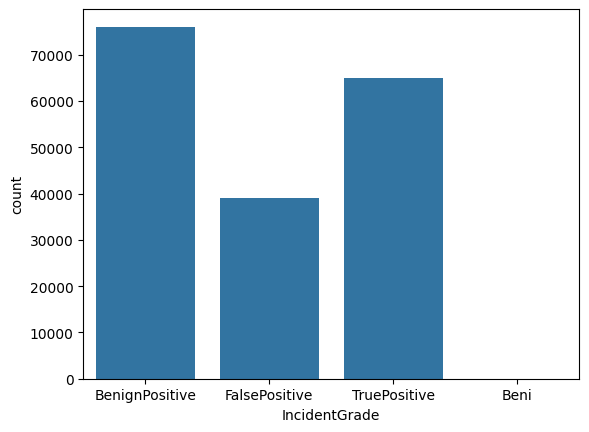

In [ ]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=data)
plt.show()

By plotting the barplot we can visualize the distribution of IncidentGrade counts across days of the month where on y-axis we can see the count and on x-axis we can see day of the month and BeingPositive represented by blue colour, FalsePositive Represented by orange colour and TruePositive represented by green colour

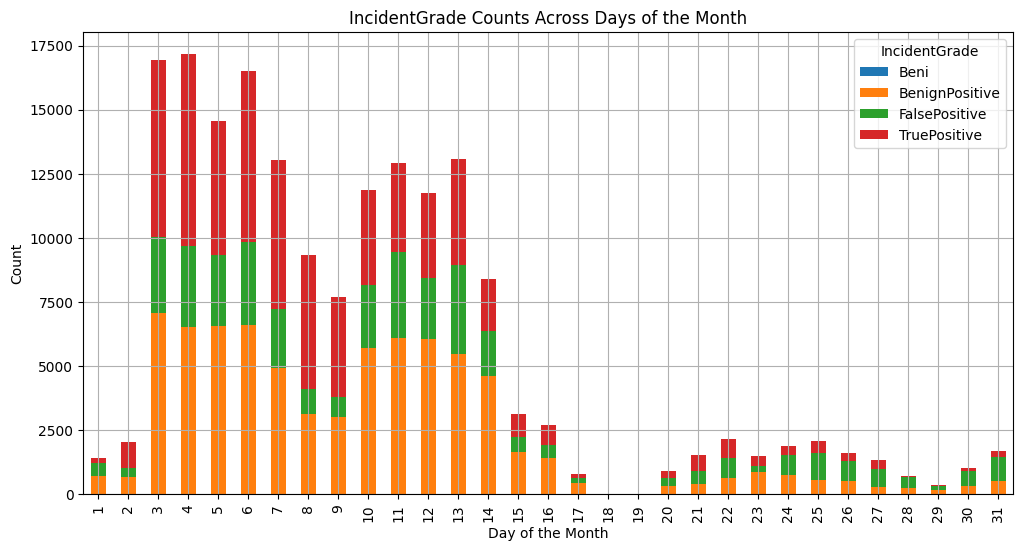

In [ ]:
# Aggregate data
day_incident_grade = data.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

Following barplot tells us counts of various columns on y-axis we can see the counts which we will multiply by 10 raise to power 6 as we can see le6 on left corner of barplot and x-axis represnt the columns with respect to IncidentGrade

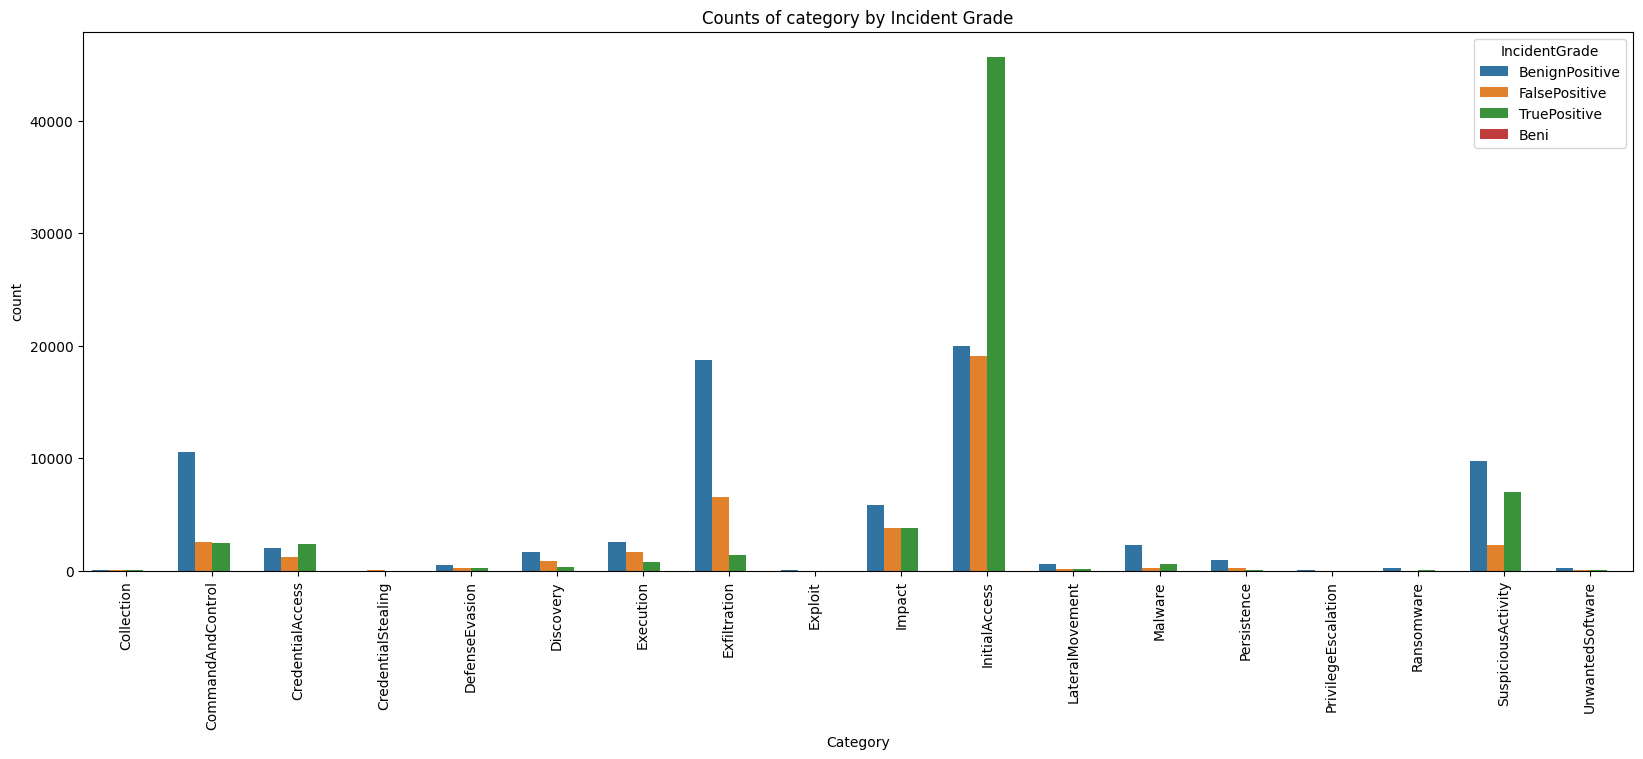

In [ ]:
#Aggregate data
grouped_data=data.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show()

Crearing a barplot with matplotlib which contains counts of entity type by incident grade, on y-axis we can see the count and on the x-axis we can see the entity type which are column names

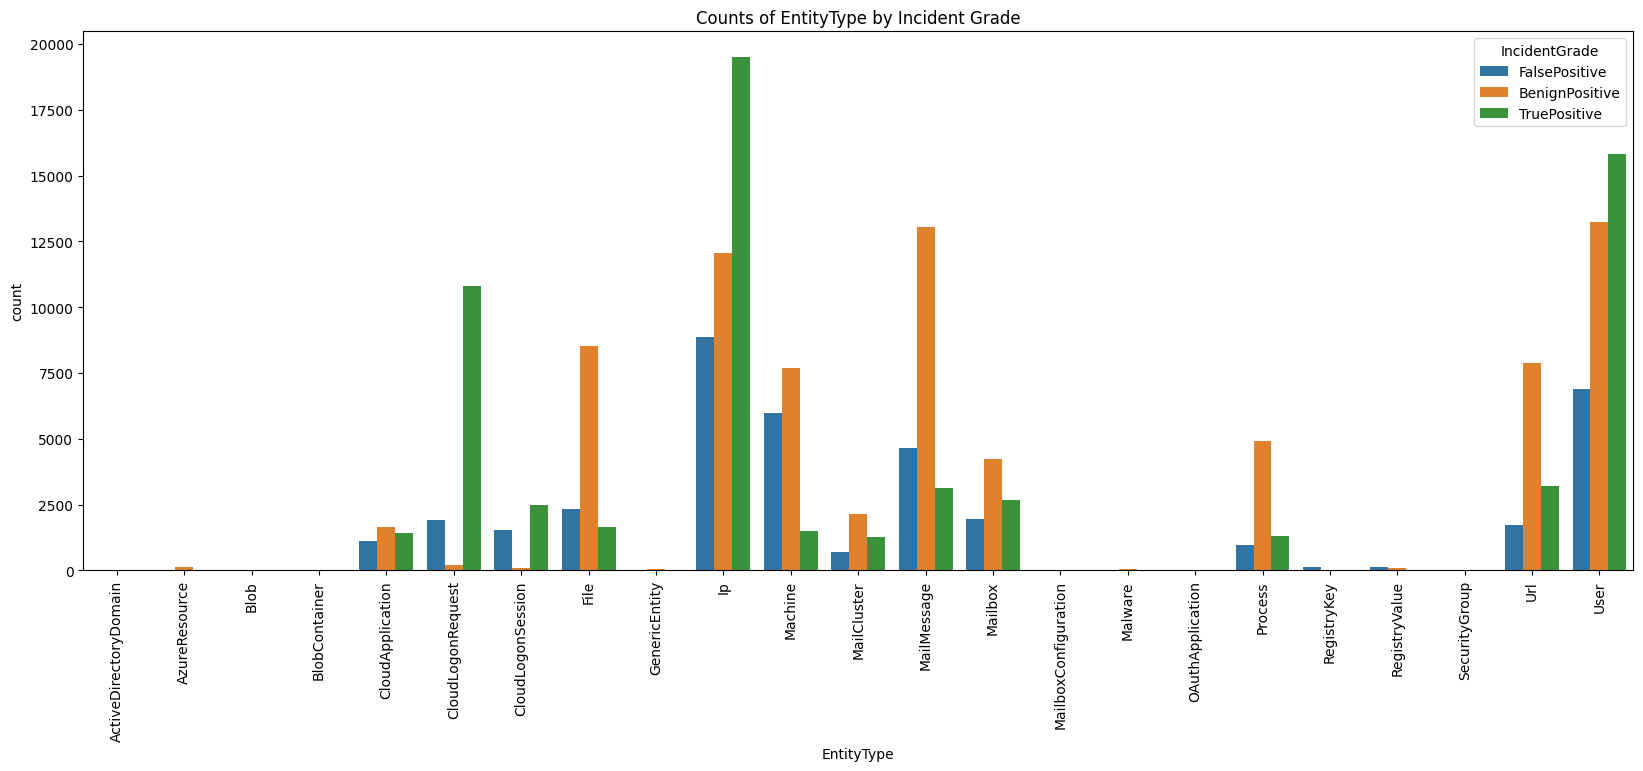

In [ ]:
# Aggregate data
grouped_data=data.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()

We will drop the 70% of correlated columns as we didn't need them in our analysis and model training

In [ ]:
# dropping 70% above correlated columns
data.drop(["Month","DeviceName","DeviceId","ResourceIdName","ActionGranular","MitreTechniques","ActionGrouped","EmailClusterId","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)

Now we will Fill the missing values in State, country code, and city columns

In [ ]:
data['State'].fillna(data['State'].mode()[0], inplace=True)
data['CountryCode'].fillna(data['CountryCode'].mode()[0], inplace=True)
data['City'].fillna(data['City'].mode()[0], inplace=True)

<ipython-input-29-888fc5764d01>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['State'].fillna(data['State'].mode()[0], inplace=True)
<ipython-input-29-888fc5764d01>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179919 entries, 0 to 179918
Data columns (total 40 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 179919 non-null  int64  
 1   OrgId              179919 non-null  int64  
 2   IncidentId         179919 non-null  int64  
 3   AlertId            179919 non-null  int64  
 4   DetectorId         179919 non-null  int64  
 5   AlertTitle         179919 non-null  int64  
 6   Category           179919 non-null  object 
 7   IncidentGrade      179919 non-null  object 
 8   EntityType         179918 non-null  object 
 9   EvidenceRole       179918 non-null  object 
 10  Sha256             179918 non-null  float64
 11  IpAddress          179918 non-null  float64
 12  Url                179918 non-null  float64
 13  AccountSid         179918 non-null  float64
 14  AccountUpn         179918 non-null  float64
 15  AccountObjectId    179918 non-null  float64
 16  Ac

To Check the Corelation between the columns in the data we will place Heatmap, after it we will remove the correlated columns from the dataset

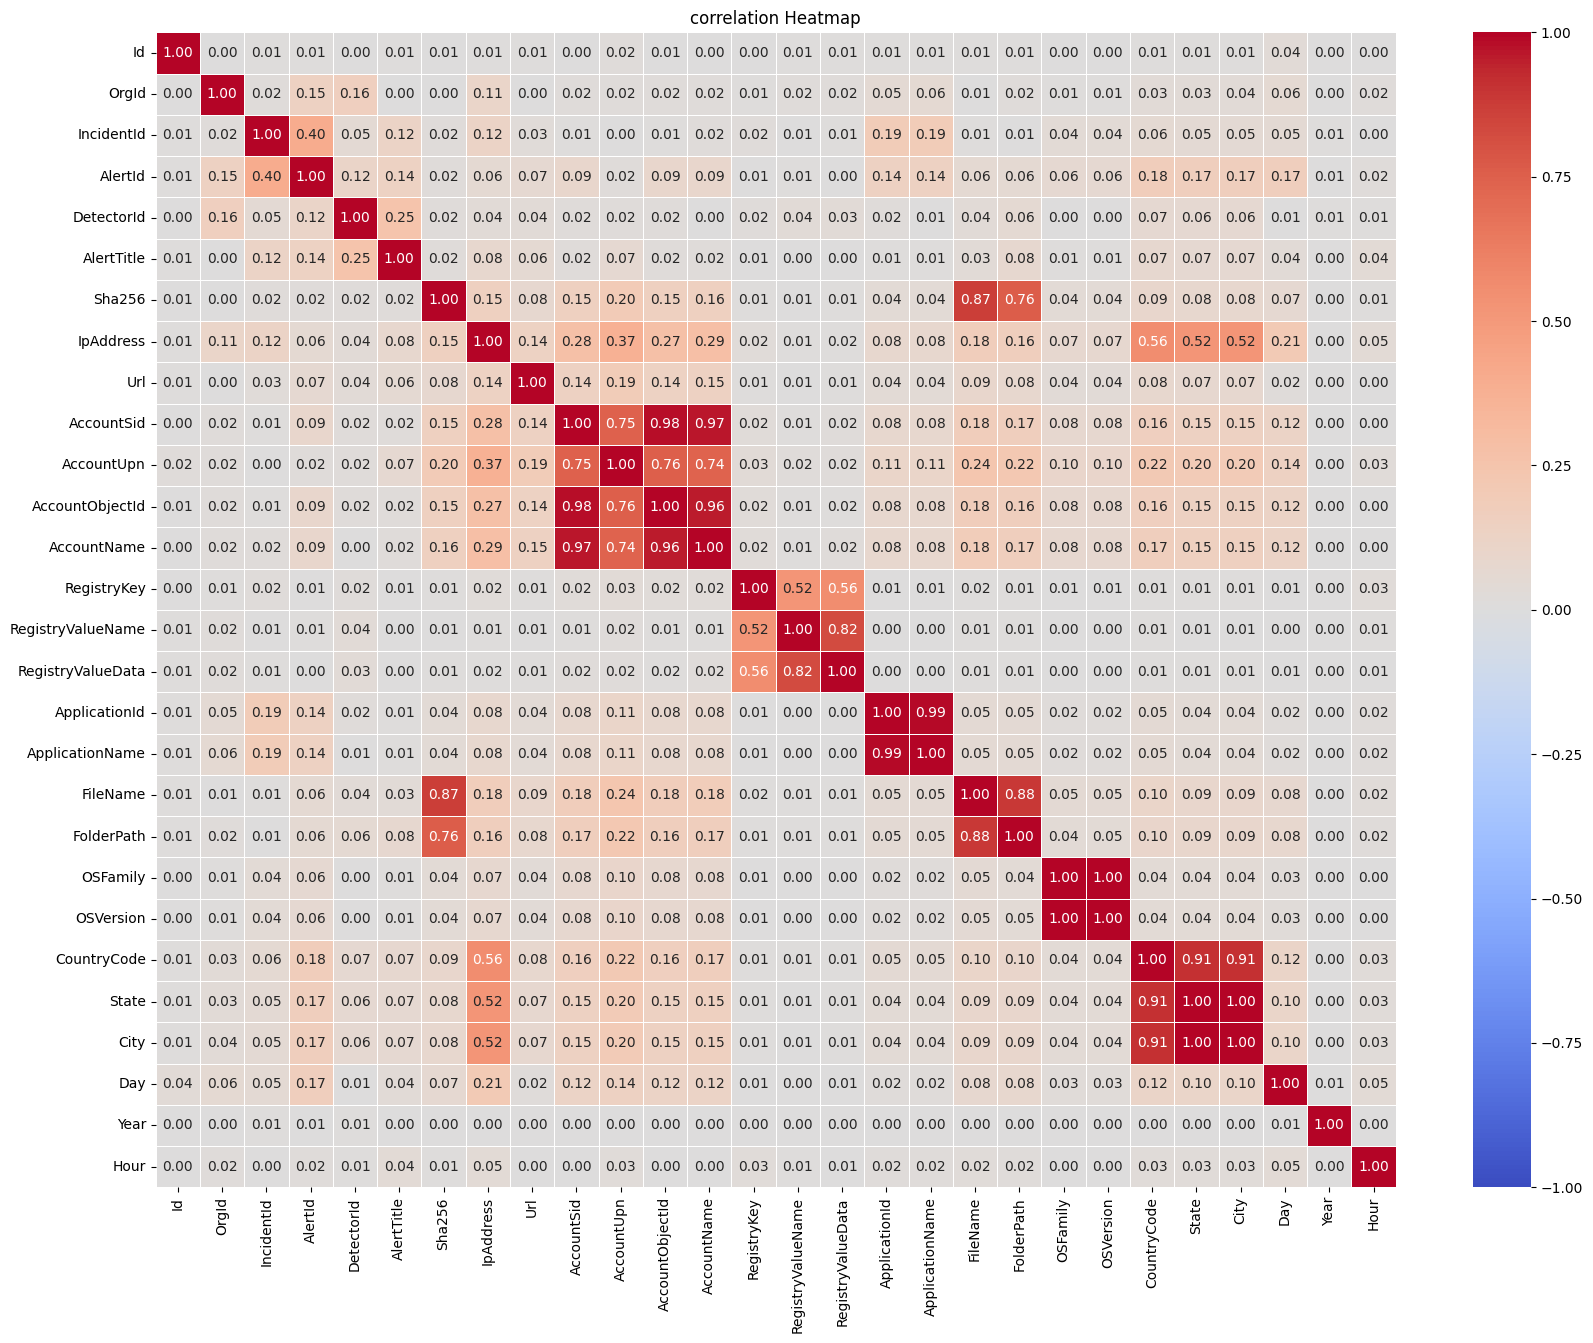

In [ ]:
# selecting numerical col
numeric_df=data.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

# **Removing the Correlated columns from the DataFrame**

In [ ]:
# dropping 70% above correlated columns
data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)

In [ ]:
# dropping 70% above correlated columns
data.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)

In [ ]:
# dropping 70% above correlated columns
data.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True)

In [ ]:
# dropping 70% above correlated columns
data.drop(["ThreatFamily","ResourceType","Roles","AntispamDirection","SuspicionLevel","LastVerdict"],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179919 entries, 0 to 179918
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrgId          179919 non-null  int64  
 1   IncidentId     179919 non-null  int64  
 2   AlertId        179919 non-null  int64  
 3   AlertTitle     179919 non-null  int64  
 4   Category       179919 non-null  object 
 5   IncidentGrade  179919 non-null  object 
 6   EntityType     179918 non-null  object 
 7   EvidenceRole   179918 non-null  object 
 8   IpAddress      179918 non-null  float64
 9   Url            179918 non-null  float64
 10  ApplicationId  179918 non-null  float64
 11  City           179919 non-null  float64
 12  Usage          179918 non-null  object 
 13  Day            179919 non-null  int32  
 14  Year           179919 non-null  int32  
 15  Hour           179919 non-null  int32  
 16  Time           179919 non-null  object 
dtypes: float64(4), int32(3), int6

Identifying the object datatype and printing them for futher analysis

In [ ]:
data.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time'],
      dtype='object')

In [ ]:
Categorical_coltr=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time']

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Encode categorical columns
categorical_columns = ['Category', 'EntityType', 'EvidenceRole', 'Time']
label_encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separate features and target
oval = data.drop(columns=['OrgId', 'IncidentId', 'AlertId', 'Time', 'IncidentGrade'])
atar = data['IncidentGrade']

# Apply oversampling
os = RandomOverSampler(random_state=94)
oval_resampled, atar_resampled = os.fit_resample(oval, atar)

print("Original class distribution:\n", atar.value_counts())
print("Resampled class distribution:\n", atar_resampled.value_counts())


Original class distribution:
 IncidentGrade
BenignPositive    76070
TruePositive      64899
FalsePositive     38949
Beni                  1
Name: count, dtype: int64
Resampled class distribution:
 IncidentGrade
BenignPositive    76070
FalsePositive     76070
TruePositive      76070
Beni              76070
Name: count, dtype: int64


# **Encoder**
Applying encoder to convert categorical values into numerical values.

Selecting the columns which are of datatype int32, int 64 and float64

In [ ]:
data.select_dtypes(include=["int32", "int64","float64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'EntityType', 'EvidenceRole', 'IpAddress', 'Url', 'ApplicationId',
       'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [ ]:
# TRAIN TEST SPLIT
data.head()

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Usage,Day,Year,Hour,Time
0,657,11767,87199,563,11,BenignPositive,22,0,360606.0,160396.0,2251.0,10630.0,Private,4,2024,22,62920
1,3,91158,632273,2,1,BenignPositive,10,0,360606.0,160396.0,2251.0,10630.0,Public,3,2024,12,33725
2,145,32247,131719,10807,11,BenignPositive,17,1,360606.0,160396.0,2251.0,10630.0,Public,8,2024,3,8707
3,222,15294,917686,0,10,FalsePositive,6,1,360606.0,160396.0,2251.0,10630.0,Public,12,2024,12,31285
4,363,7615,5944,18,5,BenignPositive,22,0,360606.0,160396.0,2251.0,10630.0,Public,6,2024,17,47853


# **RandomOverSampler**
it creates an instance of this class with a random state of 94 with features val and target vairable tar. , val contains all columns expect the IncidentGrade column which is assigned to the tar variable

In [ ]:
from imblearn.over_sampling import RandomOverSampler


os =RandomOverSampler(random_state = 94)
oval =data.drop('IncidentGrade', axis =1)
otar = data['IncidentGrade']

Counting the total counts of the target varibale with is IncidentGrade.

In [ ]:
otar.value_counts()

,count
IncidentGrade,
BenignPositive,76070
TruePositive,64899
FalsePositive,38949
Beni,1


To Oversample the miniority class we used the randomoversampler to balance the class

In [ ]:
oval,otar = os.fit_resample(oval,otar)

It will count the values of the otar which is our target variable after the oversampling

In [ ]:
otar.value_counts()

,count
IncidentGrade,
BenignPositive,76070
FalsePositive,76070
TruePositive,76070
Beni,76070


For classification task , we intiallize the random forest classifier with 800 trees anf 79 random state

In [ ]:
RC = RandomForestClassifier(n_estimators = 800, random_state =79)

Here we used fit function before training our machine learning model on oversampled data oval which represent features and otar represnt targert variable

This first creates a DataFrame with two columns: "columns" and "Score". The "columns" column store the column names from the oval DataFrame, and the "Score" column stores the feature importances which is calculated by the Random Forest Classifier (RC)

By selecting these columns it reduces dimensions of the data and improve its model performance

In [ ]:
oval = oval[[
 'AlertTitle',
 'Day',
 'Category',
 'EntityType',
 'Hour',
 'IpAddress',
 'City',
 'Url',
 'EvidenceRole',
 'ApplicationId',
 'Year']]

Now we will use train data and test data and split it by train_test-split with random state 43

In [ ]:
traindata,testdata, trainlab,testlab = train_test_split(oval,otar, test_size = 0.20, random_state = 43)

In [ ]:
traindata.shape

(243424, 11)

# **Importing the Libraries RandomForestClassifier and xgboost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost

Creating Decision Tree with more parameters to prevent model from overfitting and complexity of model

In [ ]:
dt_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")

Training the data with Decision tree classifier

In [ ]:
dt_model.fit(traindata,trainlab)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

This defines a function which will calculate and return a DataFrame containing key performance metrics (accuracy, precision, recall, macro F1-score) for a classification model.

In [ ]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

Making the predictions on the train data and test data

In [ ]:
dttr_pred =dt_model.predict(traindata)
dtts_pred =dt_model.predict(testdata)

In [ ]:
dttrain_metrics=metrics(trainlab,dttr_pred)
dttest_metrics=metrics(testlab,dtts_pred)

Making the dataframe for comparing the training and testing data

In [ ]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,70.403083,70.302024
1,Precision,71.413121,71.260384
2,Recall,70.405750,70.290642
3,Macro F1,70.412648,70.289680


Defining and training the RandomForestClassifier with specific parameters like entropy to measure the imformation gain got from spliiting and morw features to enhance the performance of the model.

In [ ]:
# RANDOM FOREST
classifier=RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)
classifier.fit(traindata,trainlab)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=100)

In [ ]:
rftr_pred =classifier.predict(traindata)
rfts_pred =classifier.predict(testdata)

In [ ]:
rftrain_metrics=metrics(trainlab,rftr_pred)
rftest_metrics=metrics(testlab,rfts_pred)

In [ ]:
pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Testing":rftest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,74.924412,74.605626
1,Precision,77.039767,76.577261
2,Recall,74.929494,74.585516
3,Macro F1,74.683629,74.363603


Traning the xgboost model with specific hyperparameters and use it to make predictions

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
trainlab_encoded = label_encoder.fit_transform(trainlab)
testlab_encoded = label_encoder.transform(testlab)  # Use the same encoder

# Mapping of labels
print("Label Mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Label Mapping: {'Beni': 0, 'BenignPositive': 1, 'FalsePositive': 2, 'TruePositive': 3}


In [ ]:
import xgboost as xgb

# Initialize the XGBoost model
xgbmodel = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=100,
    n_jobs=-1,
    max_depth=8
)

# Fit the model with encoded labels
xgbmodel.fit(traindata, trainlab_encoded)

# Predict using the model
xgbtr_pred = xgbmodel.predict(traindata)
xgbts_pred = xgbmodel.predict(testdata)



In [ ]:
xgbtr_pred_decoded = label_encoder.inverse_transform(xgbtr_pred)
xgbts_pred_decoded = label_encoder.inverse_transform(xgbts_pred)

This will provide us insights into the model's performance on both seen (training) and unseen (testing) data

In [ ]:
# Pad the shorter array to match the longer one (training predictions)
max_len = max(len(xgbtr_pred_decoded), len(xgbts_pred_decoded))
xgbtr_pred_decoded_padded = np.pad(xgbtr_pred_decoded, (0, max_len - len(xgbtr_pred_decoded)), mode='constant', constant_values=np.nan)
xgbts_pred_decoded_padded = np.pad(xgbts_pred_decoded, (0, max_len - len(xgbts_pred_decoded)), mode='constant', constant_values=np.nan)

# Create DataFrame with padded predictions
V = pd.DataFrame({
    "Training": xgbtr_pred_decoded_padded,
    "Testing": xgbts_pred_decoded_padded
}).reset_index(drop=True)

# Display the first few rows
print(V.head())


         Training         Testing
0  BenignPositive   FalsePositive
1  BenignPositive   FalsePositive
2            Beni            Beni
3   FalsePositive   FalsePositive
4   FalsePositive  BenignPositive


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for training and testing sets
accuracy_train = accuracy_score(trainlab, xgbtr_pred_decoded)
accuracy_test = accuracy_score(testlab, xgbts_pred_decoded)

precision_train = precision_score(trainlab, xgbtr_pred_decoded, average='macro')
precision_test = precision_score(testlab, xgbts_pred_decoded, average='macro')

recall_train = recall_score(trainlab, xgbtr_pred_decoded, average='macro')
recall_test = recall_score(testlab, xgbts_pred_decoded, average='macro')

f1_train = f1_score(trainlab, xgbtr_pred_decoded, average='macro')
f1_test = f1_score(testlab, xgbts_pred_decoded, average='macro')

# Create the DataFrame with metrics
metrics_df = pd.DataFrame({
    "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
    "Training": [accuracy_train, precision_train, recall_train, f1_train],
    "Testing": [accuracy_test, precision_test, recall_test, f1_test]
})

# Print the metrics DataFrame
print(metrics_df)


     Metrics  Training   Testing
0   Accuracy  0.826817  0.813889
1  Precision  0.833804  0.820842
2     Recall  0.826817  0.813882
3   Macro F1  0.826981  0.814223


# **Now Using the Test Data**
Importing the datset is the first step after the importing the libraries

In [ ]:
df=pd.read_csv(r"GUIDE_Test.csv", encoding = 'unicode_escape')

# **Printing the Head of Dataset**
When we want to print the first five Rows of the data we use Data.head()

In [ ]:
df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0.0,0.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public


Displaying Maximun values of the columns

In [ ]:
pd.set_option('display.max_columns', None)
df.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799.0,138268.0,360606.0,160396.0,2610.0,3699.0,425863.0,863.0,153085.0,529644.0,NaN,1631.0,635.0,860.0,2251.0,3421.0,881.0,NaN,289573.0,117668.0,3586.0,NaN,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Private


In [ ]:
df.shape

(179919, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179919 entries, 0 to 179918
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  179919 non-null  int64  
 1   OrgId               179919 non-null  int64  
 2   IncidentId          179919 non-null  int64  
 3   AlertId             179919 non-null  int64  
 4   Timestamp           179919 non-null  object 
 5   DetectorId          179919 non-null  int64  
 6   AlertTitle          179919 non-null  int64  
 7   Category            179919 non-null  object 
 8   MitreTechniques     79834 non-null   object 
 9   IncidentGrade       179919 non-null  object 
 10  ActionGrouped       81 non-null      object 
 11  ActionGranular      81 non-null      object 
 12  EntityType          179918 non-null  object 
 13  EvidenceRole        179918 non-null  object 
 14  DeviceId            179918 non-null  float64
 15  Sha256              179918 non-nul

# **Handling data**
# **Removing columns**
Removing those columns which has null values above 50%

First we set the threshold to 50% and the we dropped the columns

In [ ]:
threshold= len(df)* 0.5   # removing 50% above null value
df.dropna(thresh=threshold,axis=1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,BenignPositive,User,Impacted,98799.0,138268.0,360606.0,160396.0,2610.0,3699.0,425863.0,863.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239.0,138268.0,360606.0,160396.0,441377.0,673934.0,425863.0,453297.0,2833.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,0.0,0.0,242.0,1445.0,10630.0,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,BenignPositive,Process,Related,98799.0,4296.0,360606.0,160396.0,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,14.0,22.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799.0,138268.0,360606.0,160396.0,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,BenignPositive,User,Impacted,98799.0,138268.0,360606.0,160396.0,133549.0,673934.0,425863.0,136104.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179914,764504183844,46,2165,670497,2024-06-06T19:52:28.000Z,217,194,Execution,TruePositive,Malware,Related,98799.0,138268.0,360606.0,160396.0,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public
179915,403726930587,9,77,231675,2024-06-05T16:20:15.000Z,40,38828,Exfiltration,BenignPositive,MailMessage,Impacted,98799.0,138268.0,360606.0,160396.0,441377.0,50298.0,425863.0,453297.0,153085.0,117998.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public
179916,601295424273,29,18049,13476,2024-06-04T03:53:47.000Z,819,560,InitialAccess,BenignPositive,Url,Related,98799.0,138268.0,360606.0,7468.0,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Private
179917,1211180780890,2,5079,3413,2024-06-11T08:05:27.000Z,18,14,Exfiltration,BenignPositive,User,Impacted,98799.0,138268.0,360606.0,160396.0,441377.0,14034.0,425863.0,701.0,153085.0,529644.0,1631.0,635.0,860.0,2251.0,3421.0,881.0,289573.0,117668.0,3586.0,5.0,66.0,242.0,1445.0,10630.0,Public


In [ ]:
df.shape

(179919, 46)

# **Checking for the duplicates Values**
We will Check for the duplicate values then we will remove the duplicate values usinfg drop_duplicate function

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179919 entries, 0 to 179918
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  179919 non-null  int64  
 1   OrgId               179919 non-null  int64  
 2   IncidentId          179919 non-null  int64  
 3   AlertId             179919 non-null  int64  
 4   Timestamp           179919 non-null  object 
 5   DetectorId          179919 non-null  int64  
 6   AlertTitle          179919 non-null  int64  
 7   Category            179919 non-null  object 
 8   MitreTechniques     79834 non-null   object 
 9   IncidentGrade       179919 non-null  object 
 10  ActionGrouped       81 non-null      object 
 11  ActionGranular      81 non-null      object 
 12  EntityType          179918 non-null  object 
 13  EvidenceRole        179918 non-null  object 
 14  DeviceId            179918 non-null  float64
 15  Sha256              179918 non-nul

# **Imputation because of Catagorical columns**
We saw that we have missing values in the categorical columns for it we used imputation technique in column "IncidentGrade"

In [ ]:
#mode imputation because of catagorial columns

df["IncidentGrade"].fillna(df["IncidentGrade"].mode()[0],inplace=True)

<ipython-input-76-db978c554c6b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["IncidentGrade"].fillna(df["IncidentGrade"].mode()[0],inplace=True)


## **Handling the Timestamp column**
We will convert Timestamp column into datetime format for easily understatement of df and time.

In [ ]:
df['Timestamp']=pd.to_datetime(df['Timestamp']) # df clean Timestamp

In [ ]:
df['Timestamp'].head()

,Timestamp
0,2024-06-04 22:56:27+00:00
1,2024-06-03 12:58:26+00:00
2,2024-06-08 03:20:49+00:00
3,2024-06-12 12:07:31+00:00
4,2024-06-06 17:42:05+00:00


After getting the TImeStamp, we will made different columns like day, month,year,hour and time

In [ ]:
df["Day"]=df["Timestamp"].dt.day
df["Month"]=df["Timestamp"].dt.month
df["Year"]=df["Timestamp"].dt.year
df["Hour"]=df["Timestamp"].dt.hour
df["Time"]=df["Timestamp"].dt.time

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

['MitreTechniques',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City',
 'Usage']

In [ ]:
df.drop("Timestamp", axis=1, inplace=True)

In [ ]:
pd.set_option("display.max_columns", None)
df.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799.0,138268.0,360606.0,160396.0,2610.0,3699.0,425863.0,863.0,153085.0,529644.0,NaN,1631.0,635.0,860.0,2251.0,3421.0,881.0,NaN,289573.0,117668.0,3586.0,NaN,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239.0,138268.0,360606.0,160396.0,441377.0,673934.0,425863.0,453297.0,2833.0,529644.0,NaN,1631.0,635.0,860.0,2251.0,3421.0,881.0,NaN,289573.0,117668.0,3586.0,NaN,NaN,0.0,0.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799.0,4296.0,360606.0,160396.0,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,NaN,1631.0,635.0,860.0,2251.0,3421.0,881.0,NaN,14.0,22.0,3586.0,NaN,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799.0,138268.0,360606.0,160396.0,441377.0,673934.0,425863.0,453297.0,153085.0,529644.0,NaN,1631.0,635.0,860.0,2251.0,3421.0,881.0,NaN,289573.0,117668.0,3586.0,NaN,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799.0,138268.0,360606.0,160396.0,133549.0,673934.0,425863.0,136104.0,153085.0,529644.0,NaN,1631.0,635.0,860.0,2251.0,3421.0,881.0,NaN,289573.0,117668.0,3586.0,NaN,Suspicious,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public,6,6,2024,17,17:42:05


In [ ]:
df['IncidentGrade'].value_counts()

,count
IncidentGrade,
BenignPositive,76070
TruePositive,64899
FalsePositive,38949
Beni,1


In [ ]:
df.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive', 'Beni'],
      dtype=object)

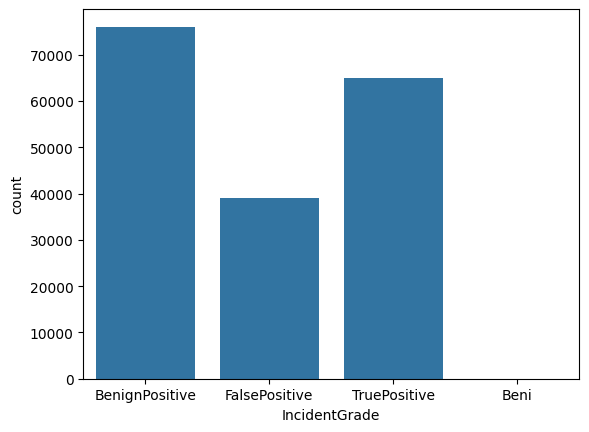

In [ ]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=df)
plt.show()

By plotting the barplot we can visualize the distribution of IncidentGrade counts across days of the month where on y-axis we can see the count and on x-axis we can see day of the month and BeingPositive represented by blue colour, FalsePositive Represented by orange colour and TruePositive represented by green colour

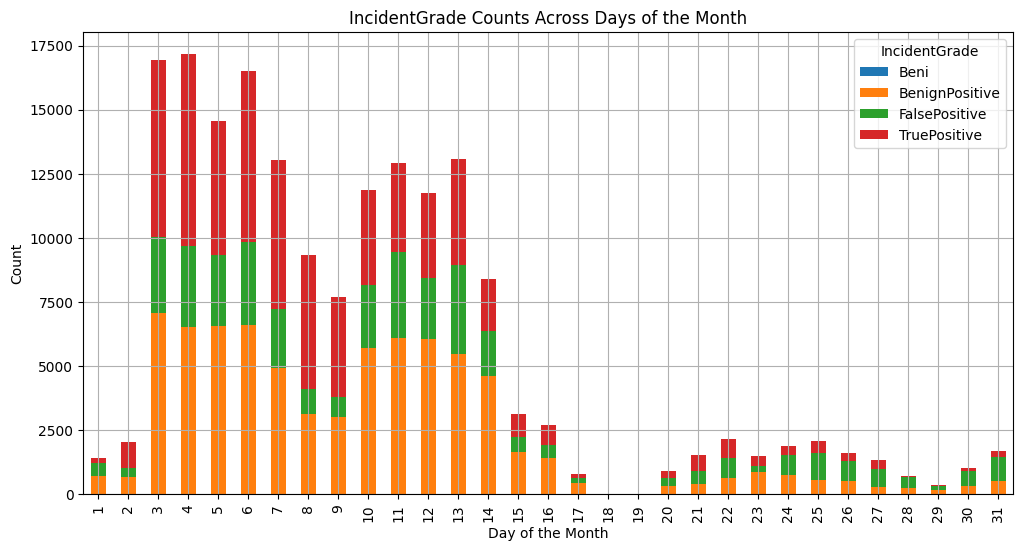

In [ ]:
# Aggregate data
day_incident_grade = df.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

By plotting the barplot we can visualize the distribution of IncidentGrade counts across hour of day where on y-axis we can see the count and on x-axis we can see hour of the day and BeingPositive represented by blue colour, FalsePositive Represented by orange colour and TruePositive represented by green colour

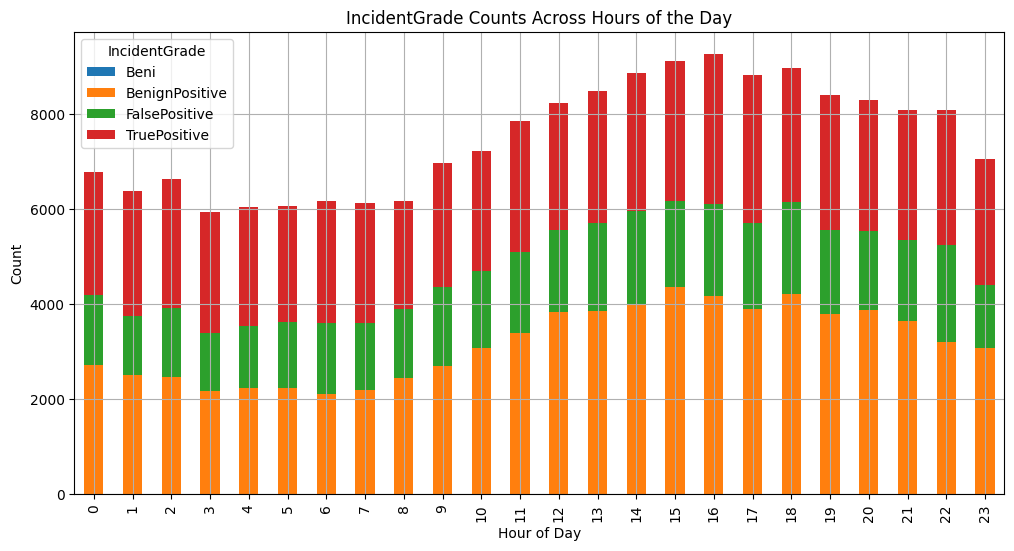

In [ ]:
# Aggregate data

hour_incident =df.groupby(['Hour', 'IncidentGrade']).size().unstack()

hour_incident.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Hour of Day")
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title="IncidentGrade")
plt.grid(True)
plt.show()

In [ ]:
# dropping 70% above correlated columns
df.drop(["DeviceName","DeviceId","ResourceIdName","ActionGranular","MitreTechniques","ActionGrouped","EmailClusterId","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)

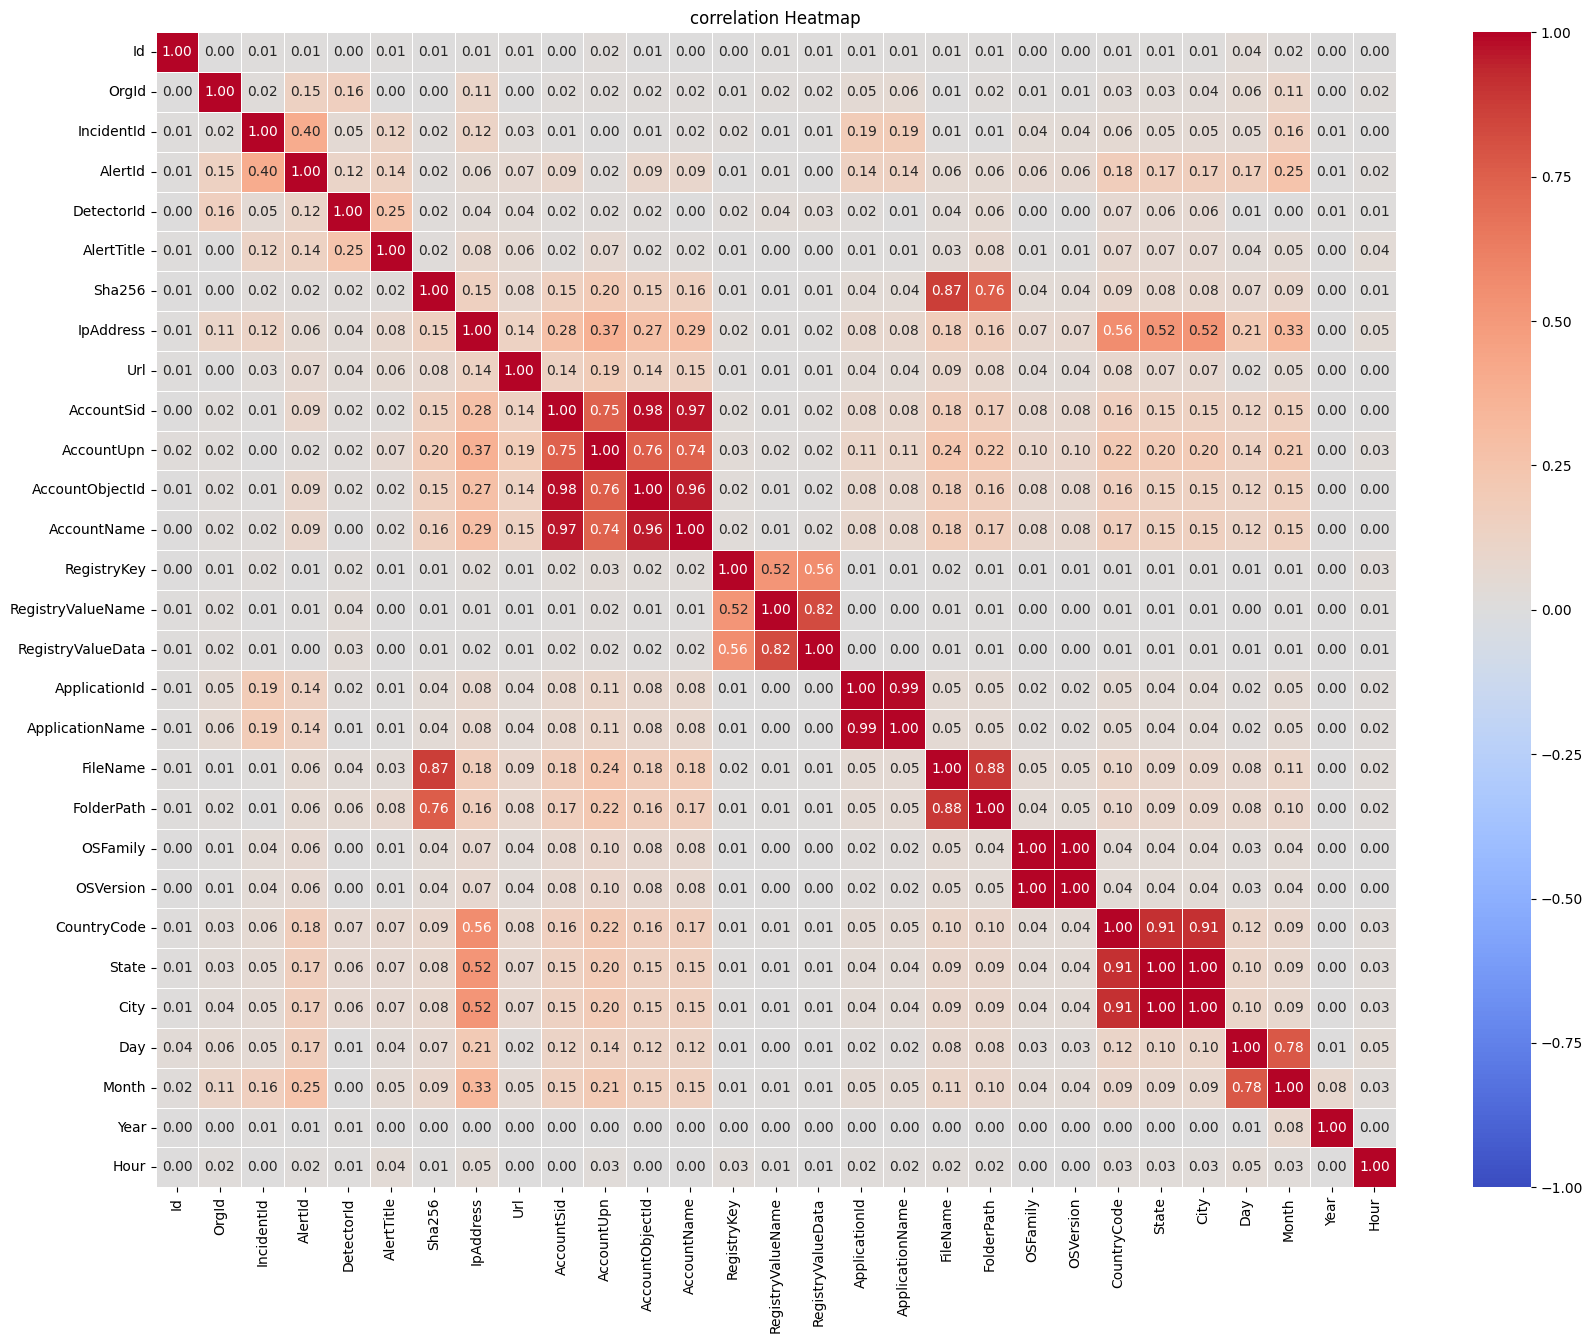

In [ ]:
# selecting numerical col
numeric_df=df.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

# **Removing the Correlated columns from the dataframe**

In [ ]:
# dropping 70% above correlated columns
df.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","OSFamily","OSVersion","AccountObjectId","State","FolderPath","AccountUpn"], axis =1 , inplace = True)

Identifying the object datatype and printing them for futher analysis

In [ ]:
df.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'Usage', 'Time'],
      dtype='object')

In [ ]:
Categorical_colts=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'Time']

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Encode categorical columns
categorical_columns = ['Category', 'EntityType', 'EvidenceRole',]
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
oval = df.drop(columns=['OrgId', 'IncidentId', 'AlertId', 'Time', 'IncidentGrade'])
atar = df['IncidentGrade']

# Apply oversampling
os = RandomOverSampler(random_state=94)
oval_resampled, atar_resampled = os.fit_resample(oval, atar)

print("Original class distribution:\n", atar.value_counts())
print("Resampled class distribution:\n", atar_resampled.value_counts())

Original class distribution:
 IncidentGrade
BenignPositive    76070
TruePositive      64899
FalsePositive     38949
Beni                  1
Name: count, dtype: int64
Resampled class distribution:
 IncidentGrade
BenignPositive    76070
FalsePositive     76070
TruePositive      76070
Beni              76070
Name: count, dtype: int64


In [ ]:
df.select_dtypes(include=["int32", "int64"]).columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Day', 'Month', 'Year',
       'Hour'],
      dtype='object')

In [ ]:
df1=df.copy()

In [ ]:
df1.to_csv(r'"C:\Users\91993\Pictures\mtest_process.csv"',index= False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Encode categorical columns
categorical_columns = ['Category', 'EntityType', 'EvidenceRole',]
label_encoder = LabelEncoder()

for col in categorical_columns:
    df1[col] = label_encoder.fit_transform(df1[col])

# Separate features and target
oval = df.drop(columns=['OrgId', 'IncidentId', 'AlertId', 'Time', 'IncidentGrade'])
atar = df['IncidentGrade']

# Apply oversampling
os = RandomOverSampler(random_state=94)
oval_resampled, atar_resampled = os.fit_resample(oval, atar)

print("Original class distribution:\n", atar.value_counts())
print("Resampled class distribution:\n", atar_resampled.value_counts())

Original class distribution:
 IncidentGrade
BenignPositive    76070
TruePositive      64899
FalsePositive     38949
Beni                  1
Name: count, dtype: int64
Resampled class distribution:
 IncidentGrade
BenignPositive    76070
FalsePositive     76070
TruePositive      76070
Beni              76070
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler

os =RandomOverSampler(random_state = 45)
oval =df1.drop('IncidentGrade', axis =1)
otar = df1['IncidentGrade']

In [ ]:
otar.value_counts()

,count
IncidentGrade,
BenignPositive,76070
TruePositive,64899
FalsePositive,38949
Beni,1


In [ ]:
RC= RandomForestClassifier(n_estimators = 300, random_state =56)

In [ ]:
oval=oval[[
 'DetectorId',
 'AlertTitle',
 'Id',
 'Day',
 'Category',
 'Hour',
 'AccountName',
 'EntityType',
 'IpAddress',
 'FileName']]

In [ ]:
# Train Test Split
traindata,testdata, trainlab,testlab = train_test_split(oval,otar, test_size = 0.20, random_state = 43)

In [ ]:
traindata.shape

(143935, 10)

In [ ]:
testdata.shape

(35984, 10)

# Importing the Libraries RandomForestClassifier and xgboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost

Creating Decision Tree with more parameters to prevent model from overfitting and complexity of model

In [ ]:
dt_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")

Training the data with Decision tree classifier

In [ ]:
dt_model.fit(traindata,trainlab)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

This defines a function which will calculate and return a dfFrame containing key performance metrics (accuracy, precision, recall, macro F1-score) for a classification model

In [ ]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

Making the predictions on the train df and test df

In [ ]:
dttr_pred =dt_model.predict(traindata)
dtts_pred =dt_model.predict(testdata)

In [ ]:
dttrain_metrics=metrics(trainlab,dttr_pred)
dttest_metrics=metrics(testlab,dtts_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Making the dataframe for comparing the training and testing data

In [ ]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,70.806267,70.595265
1,Precision,55.721721,73.833143
2,Recall,48.742038,64.864299
3,Macro F1,49.632189,65.963780


Defining and training the RandomForestClassifier with specific parameters like entropy to measure the imformation gain got from spliiting and morw features to enhance the performance of the model.

In [ ]:
# RANDOM FOREST
rfc =RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)

Fit the train data and train lab using randomForestClassifier

In [ ]:
rfc.fit(traindata,trainlab)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=100)

In [ ]:
rftr_pred =rfc.predict(traindata)
rfts_pred =rfc.predict(testdata)

In [ ]:
rftrain_metrics=metrics(trainlab,rftr_pred)
rftest_metrics=metrics(testlab,rfts_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Testing":rftest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,75.584813,75.277901
1,Precision,61.755596,81.644682
2,Recall,52.528083,69.756154
3,Macro F1,54.010664,71.601843


Traning the xgboost model with specific hyperparameters and use it to make predictions

In [ ]:
# XGBoost
xgbmodel = xgboost.XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=100,n_jobs=-1,max_depth=8)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
trainlab_encoded = label_encoder.fit_transform(trainlab)
testlab_encoded = label_encoder.transform(testlab)  # Use the same encoder

# Mapping of labels
print("Label Mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

Label Mapping: {'Beni': 0, 'BenignPositive': 1, 'FalsePositive': 2, 'TruePositive': 3}


In [ ]:
import xgboost as xgb

# Initialize the XGBoost model
xgbmodel = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=100,
    n_jobs=-1,
    max_depth=8
)

# Fit the model with encoded labels
xgbmodel.fit(traindata, trainlab_encoded)

# Predict using the model
xgbtr_pred = xgbmodel.predict(traindata)
xgbts_pred = xgbmodel.predict(testdata)

In [ ]:
xgbtr_pred_decoded = label_encoder.inverse_transform(xgbtr_pred)
xgbts_pred_decoded = label_encoder.inverse_transform(xgbts_pred)

In [ ]:
# Pad the shorter array to match the longer one (training predictions)
max_len = max(len(xgbtr_pred_decoded), len(xgbts_pred_decoded))
xgbtr_pred_decoded_padded = np.pad(xgbtr_pred_decoded, (0, max_len - len(xgbtr_pred_decoded)), mode='constant', constant_values=np.nan)
xgbts_pred_decoded_padded = np.pad(xgbts_pred_decoded, (0, max_len - len(xgbts_pred_decoded)), mode='constant', constant_values=np.nan)

# Create DataFrame with padded predictions
pd.DataFrame({
    "Training": xgbtr_pred_decoded_padded,
    "Testing": xgbts_pred_decoded_padded
}).reset_index(drop=True)

,Training,Testing
0,BenignPositive,BenignPositive
1,BenignPositive,BenignPositive
2,TruePositive,FalsePositive
3,FalsePositive,TruePositive
4,BenignPositive,FalsePositive
...,...,...
143930,BenignPositive,NaN
143931,TruePositive,NaN
143932,BenignPositive,NaN
143933,TruePositive,NaN


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for training and testing sets
accuracy_train = accuracy_score(trainlab, xgbtr_pred_decoded)
accuracy_test = accuracy_score(testlab, xgbts_pred_decoded)

precision_train = precision_score(trainlab, xgbtr_pred_decoded, average='macro')
precision_test = precision_score(testlab, xgbts_pred_decoded, average='macro')

recall_train = recall_score(trainlab, xgbtr_pred_decoded, average='macro')
recall_test = recall_score(testlab, xgbts_pred_decoded, average='macro')

f1_train = f1_score(trainlab, xgbtr_pred_decoded, average='macro')
f1_test = f1_score(testlab, xgbts_pred_decoded, average='macro')

# Create the DataFrame with metrics
metrics_df = pd.DataFrame({
    "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
    "Training": [accuracy_train, precision_train, recall_train, f1_train],
    "Testing": [accuracy_test, precision_test, recall_test, f1_test]
})

# Print the metrics DataFrame
print(metrics_df)

     Metrics  Training   Testing
0   Accuracy  0.859242  0.834426
1  Precision  0.913292  0.857621
2     Recall  0.876922  0.808467
3   Macro F1  0.888970  0.824192


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'Macro F1']
models = ['Decision Tree', 'Random Forest', 'XGBoost']

# Train data
train_data = {
    'Decision Tree': [59.412724, 62.082146, 59.411835, 59.846393],
    'Random Forest': [66.417432, 68.791961, 66.419161, 66.145443],
    'XGBoost': [74.6318, 75.5281, 74.6319, 74.6642]
}

# Test data
test_data = {
    'Decision Tree': [59.440134, 62.112163, 59.443693, 59.871125],
    'Random Forest': [66.414228, 68.776270, 66.407327, 66.138819],
    'XGBoost': [74.6207, 75.5101, 74.6205, 74.6515]
}

# Convert to arrays
train_values = np.array(list(train_data.values()))
test_values = np.array(list(test_data.values()))

# Create bar plot
fig = go.Figure()

# Add bars for train and test data
for i, model in enumerate(models):
    fig.add_trace(go.Bar(
        x=metrics,
        y=train_values[i],
        name=f'{model} (Train)',
        marker=dict(color=f'rgba({50 + i * 50},150,250,0.7)')
    ))
    fig.add_trace(go.Bar(
        x=metrics,
        y=test_values[i],
        name=f'{model} (Test)',
        marker=dict(color=f'rgba({50 + i * 50},100,200,0.7)', pattern=dict(shape="x"))
    ))

# Layout customization
fig.update_layout(
    title="Model Performance Comparison",
    xaxis_title="Metrics",
    yaxis_title="Performance (%)",
    barmode='group',
    legend=dict(title="Models"),
    template="plotly_white"
)

# Show the plot
fig.show()
